In [33]:
from sympy import *
import numpy as np
init_printing()

In [2]:
i, w, a, alpha, eta = symbols('i, w, a, alpha, eta ')

In [3]:

i_plus = Piecewise((a*alpha/eta, a*alpha/eta < 1), (1, a*alpha/eta >= 1))
i_minus = Piecewise(((a-1)*alpha/eta, (a-1)*alpha/eta > 0 ), (0, (a-1)*alpha/eta <= 0 ))
i_plus = a*alpha/eta
i_minus = (a-1)*alpha/eta

In [4]:
bool(1 and 1)

True

In [27]:
Ei = Piecewise(
    ((integrate(i*(a-(i*eta)/alpha), (i, i_minus, i_plus)) + integrate(i, (i,0, i_minus)))/
    (integrate(  (a-(i*eta)/alpha), (i, i_minus, i_plus)) + integrate(1, (i, 0,i_minus)))
    , a <= alpha/eta and a >= 1),
    ((integrate(i*(a-(i*eta)/alpha), (i, i_minus, 1)) + integrate(i, (i,0, i_minus)))/
    (integrate(  (a-(i*eta)/alpha), (i, i_minus, 1)) + integrate(1, (i, 0,i_minus)))
    , a > alpha/eta and a >= 1),
    ((integrate(i*(a-(i*eta)/alpha), (i, 0, i_plus)) )/
    (integrate(  (a-(i*eta)/alpha), (i, 0, i_plus)) )
    , a <= alpha/eta and a < 1),
    ((integrate(i*(a-(i*eta)/alpha), (i, 0, 1)) )/
    (integrate(  (a-(i*eta)/alpha), (i, 0, 1)) )
    , a > alpha/eta and a < 1)
)
Ei

TypeError: cannot determine truth value of Relational

In [8]:
EiI =  (integrate(i*(a-(i*eta)/alpha), (i, i_minus, i_plus)) + integrate(i, (i,0, i_minus)))/(integrate(  (a-(i*eta)/alpha), (i, i_minus, i_plus)) + integrate(1, (i, 0,i_minus)))

EiII = (integrate(i*(a-(i*eta)/alpha), (i, i_minus, 1)) + integrate(i, (i,0, i_minus)))/ (integrate(  (a-(i*eta)/alpha), (i, i_minus, 1)) + integrate(1, (i, 0,i_minus)))

EiIII = (integrate(i*(a-(i*eta)/alpha), (i, 0, i_plus)) )/ (integrate(  (a-(i*eta)/alpha), (i, 0, i_plus)) )

EiIV = (integrate(i*(a-(i*eta)/alpha), (i, 0, 1)) )/(integrate(  (a-(i*eta)/alpha), (i, 0, 1)) )


In [23]:
GI = 1 - eta - a + eta*(EiI + alpha)/alpha
GII = 1 - eta - a + eta*(EiII + alpha)/alpha 
GIII = 1 - eta - a + eta*(EiIII + alpha)/alpha 
GIV = 1 - eta - a + eta*(EiIV + alpha)/alpha
  

In [77]:
def solvit(alpha_val, eta_val):
    solutions = []
    # Check if case I applies:
    if alpha_val/eta_val > sqrt(3):
        solutions.append(1+sqrt(3)/3)
    #solve case II 
    solutionsII = solve(GII.subs(alpha, alpha_val).subs(eta, eta_val), a)
    for solution in solutionsII:
        if np.isreal(complex(solution)):
            if solution > 1 :
                #and solution < alpha_val/eta_val:
                solutions.append(solution)
    #Case III is trivial (ie, never existsis)
    #Case IV is handled in same way as case II
    solutionsIV = solve(GIV.subs(alpha, alpha_val).subs(eta, eta_val), a)
    for solution in solutionsIV:
        if np.isreal(complex(solution)):
            print(solution)
            if solution > alpha_val/eta_val and solution < 1:
                solutions.append(solution)
        
    return solutions

0.0354085002057514
1.03459149979425


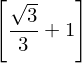

In [81]:
solvit(10, .7)

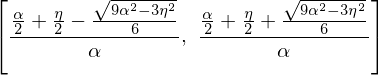

In [65]:
solve(GIV, a)

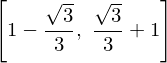

In [10]:
solve(GI, a)

Notice that case I applies if $a \in [1, \frac{\alpha}{\eta}]$, so only the second case can apply.

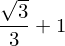

In [11]:
AI1 = solve(GI, a)[1]
AI1

We can now observe that AI1 will be a solution if $\frac{\alpha}{\eta} > \frac{\sqrt{3}}{3}+1$ and $\frac{\sqrt{3}}{3}+1 < \frac{\eta}{\alpha} +1$, which is true iff

$$\frac{\alpha}{\eta} > \sqrt{3}$$

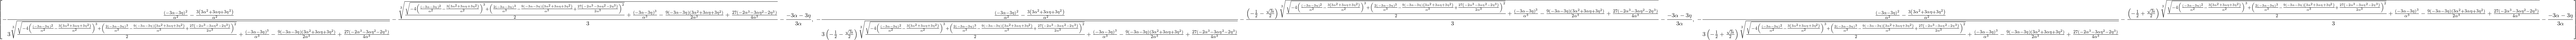

In [12]:
solve(GII, a)

In [13]:
bool(3/sqrt(3) > (1+ sqrt(5))/2)

True

In [14]:
solve(GIII, a)

We can see that case III is never valid, because it only applies in cases where $a<1$, but $\frac{3}{2} > 1$

In [21]:
solve(GIV.subs(eta, .5).subs(alpha, 1), a)

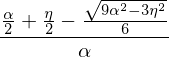

In [16]:
AIV0 = solve(GIV, a)[0]
AIV0

AIV0 is a solution when AIV0 $\in [\frac{\alpha}{\eta}, 1]$, so we will solve these boundries:

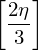

In [75]:
AIV0one = solve(AIV0 - 1, alpha)
AIV0one

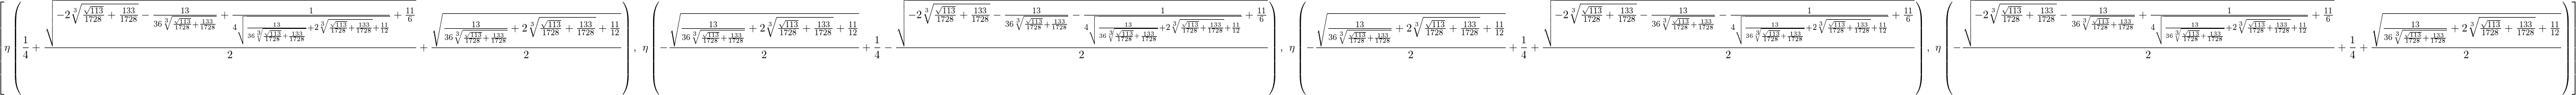

In [18]:
AIV0ae = solve(AIV0 - alpha/eta, alpha)
AIV0ae

Now let us find some selected values for $\epsilon^* = a - \frac{\eta}{\alpha}i$

<IPython.core.display.Javascript object>


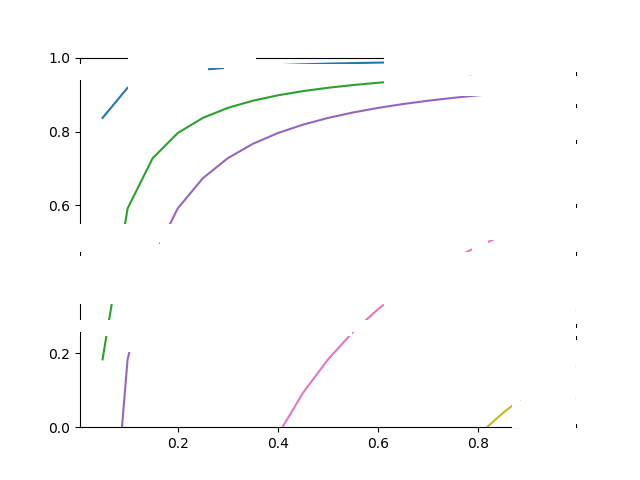

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plot_i = np.arange(0.0, 1., 0.05)
def e_star(plot_i, plot_eta_alpha):
    return 1 - np.sqrt(6)/3 + plot_eta_alpha *(1-plot_i)
plt.figure()

plot_eta_alpha = .0
plt.plot(plot_i, e_star(plot_i, plot_eta_alpha))






<IPython.core.display.Javascript object>


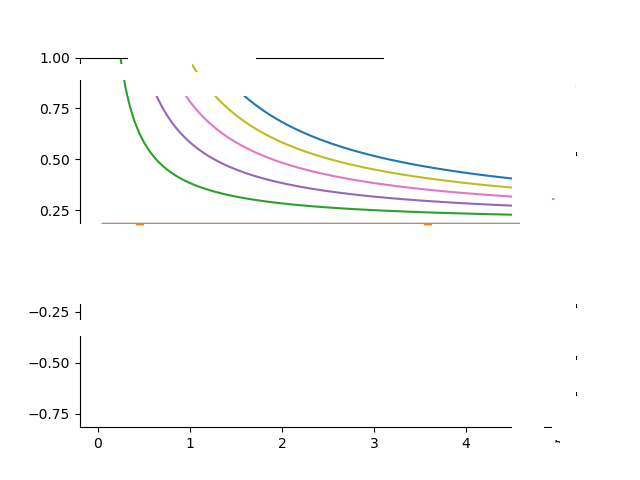

In [86]:

plot_alpha = np.arange(0.05, 5., 0.05)

def i_minus(plot_eta, plot_alpha) :
    return 1-np.sqrt(6 )* plot_alpha / (3* plot_eta)

def i_plus(plot_eta, plot_alpha) :
    return 1 + plot_alpha/plot_eta * (1 - np.sqrt(6)/3)

def a(plot_eta, plot_alpha) :
    return plot_eta/plot_alpha  +  (1 - np.sqrt(6)/3)
    
def e_star(plot_eta, plot_alpha, i):
    return a(plot_eta, plot_alpha) - plot_eta/plot_alpha * i
plt.figure()

plot_eta = .0
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 0))
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 1))
plot_eta = .2
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 0))
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 1))
plot_eta = .4
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 0))
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 1))
plot_eta = .6
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 0))
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 1))
plot_eta = .8
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 0))
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 1))
plot_eta = 1
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 0))
plt.plot(plot_alpha, e_star(plot_eta, plot_alpha, 1))

plt.ylim(top = 1)


<IPython.core.display.Javascript object>


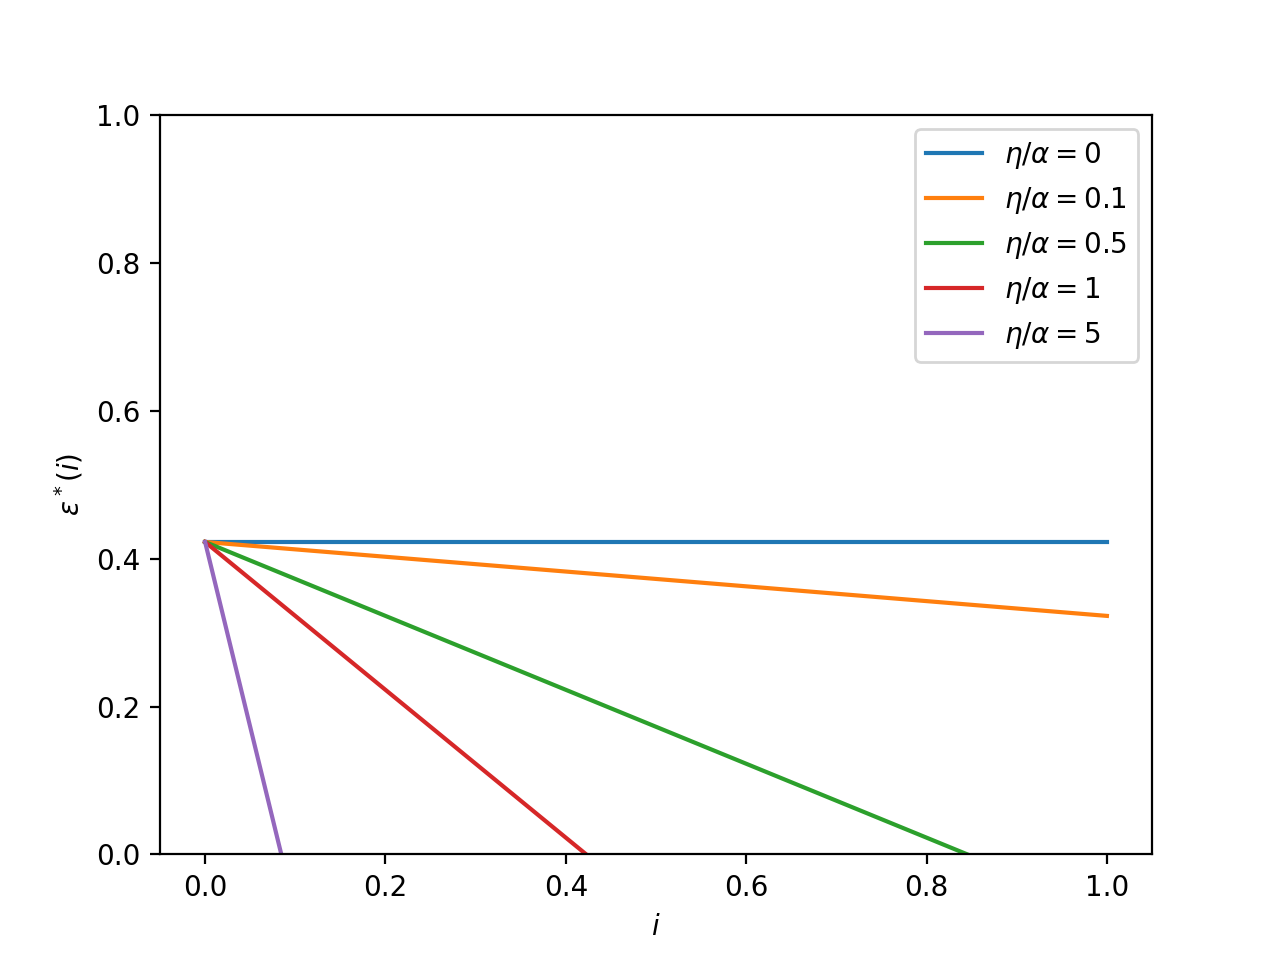

In [143]:
import matplotlib.pyplot as plt
import numpy as np

plot_i = np.arange(0.0, 1.05, 0.05)
def e_star(plot_i, plot_eta_alpha):
    return 1 - np.sqrt(3)/3 + plot_eta_alpha *(-plot_i)
plt.figure()

plot_eta_alpha = .0
plt.plot(plot_i, e_star(plot_i, plot_eta_alpha), label = r'$\eta / \alpha = 0$')


plot_eta_alpha = .1
plt.plot(plot_i, e_star(plot_i, plot_eta_alpha), label = r'$\eta / \alpha = 0.1$')


plot_eta_alpha = .5
plt.plot(plot_i, e_star(plot_i, plot_eta_alpha), label = r'$\eta / \alpha = 0.5$')


plot_eta_alpha = 1
plt.plot(plot_i, e_star(plot_i, plot_eta_alpha), label = r'$\eta / \alpha = 1$')


plot_eta_alpha = 5
plt.plot(plot_i, e_star(plot_i, plot_eta_alpha), label = r'$\eta / \alpha = 5$')

plt.ylim(top = 1, bottom = .0)
plt.xlabel(r'$i$')
plt.ylabel(r'$\epsilon^*(i)$')
plt.legend()
plt.savefig("epsilon_graph.png") # save as png



